<a href="https://colab.research.google.com/github/AMiller113/Machine_Learning/blob/master/LSTM_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q tensorflow-gpu
import tensorflow as tf
tf.__version__

     |████████████████████████████████| 421.8MB 39kB/s 
     |████████████████████████████████| 450kB 49.3MB/s 
     |████████████████████████████████| 3.8MB 17.9MB/s 
     |████████████████████████████████| 81kB 12.0MB/s 
ERROR: tensorflow 1.15.0 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 2.1.0 which is incompatible.
ERROR: tensorflow 1.15.0 has requirement tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 2.1.0 which is incompatible.
ERROR: tensorboard 2.1.0 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.10.1 which is incompatible.


'2.1.0'

In [0]:
from tensorflow.keras.layers import Input, LSTM, Dense, Flatten, GlobalMaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
# Load in the Mnist Datasets

(x_train_m, y_train_m), (x_test_m, y_test_m) = tf.keras.datasets.mnist.load_data()
(x_train_fashm, y_train_fashm), (x_test_fashm, y_test_fashm) = tf.keras.datasets.fashion_mnist.load_data()

In [0]:
# Standardize Data Sets

def StandardizeImage(dataset):
  dataset = dataset/255.0
  return dataset

x_train_m, x_train_fashm = StandardizeImage(x_train_m), StandardizeImage(x_train_fashm)
x_test_m, x_test_fashm = StandardizeImage(x_test_m), StandardizeImage(x_test_fashm) 

In [0]:
# Create LSTM model

i = Input(shape=(x_train_m.shape[1],x_train_m.shape[2]))
x = LSTM(128, return_sequences=True)(i) # Note to Self: The Number of Hidden Neurons greatly effects the accuracy
x = GlobalMaxPooling1D()(x)
x = Dense(10, activation='softmax')(x)

model = Model(i, x)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [6]:
# Train on Mnist
r = model.fit(x_train_m, y_train_m,validation_data=(x_test_m, y_test_m), epochs=20, batch_size=64)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 13s 216us/sample - loss: 0.4611 - accuracy: 0.8625 - val_loss: 0.1633 - val_accuracy: 0.9552
Epoch 2/20
60000/60000 [==============================] - 5s 92us/sample - loss: 0.1280 - accuracy: 0.9629 - val_loss: 0.1158 - val_accuracy: 0.9664
Epoch 3/20
60000/60000 [==============================] - 6s 93us/sample - loss: 0.0863 - accuracy: 0.9743 - val_loss: 0.0914 - val_accuracy: 0.9735
Epoch 4/20
60000/60000 [==============================] - 6s 98us/sample - loss: 0.0656 - accuracy: 0.9804 - val_loss: 0.0632 - val_accuracy: 0.9820
Epoch 5/20
60000/60000 [==============================] - 6s 94us/sample - loss: 0.0537 - accuracy: 0.9843 - val_loss: 0.0603 - val_accuracy: 0.9834
Epoch 6/20
60000/60000 [==============================] - 5s 90us/sample - loss: 0.0459 - accuracy: 0.9859 - val_loss: 0.0549 - val_accuracy: 0.9835
Epoch 7/20
60000/60000 [==============================

In [7]:
# Mnist Scores
print('Train Score:', model.evaluate(x_train_m, y_train_m))
print('Test Score:', model.evaluate(x_test_m, y_test_m))

60000/60000 [==============================] - 5s 91us/sample - loss: 0.0074 - accuracy: 0.9979
Train Score: [0.007448966691447034, 0.9978833]
10000/10000 [==============================] - 1s 89us/sample - loss: 0.0354 - accuracy: 0.9903
Test Score: [0.03539378044863115, 0.9903]


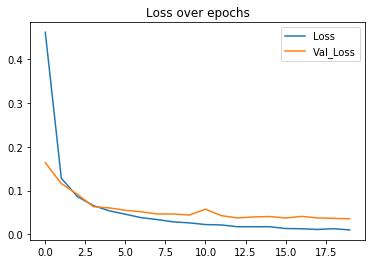

In [8]:
# Mnist Loss Plot
plt.plot(r.history['loss'], label = 'Loss')
plt.plot(r.history['val_loss'], label = 'Val_Loss')
plt.legend()
plt.title('Loss over epochs')
plt.show()

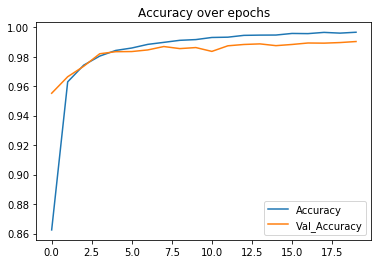

In [9]:
# Mnist Accuracy Plot
plt.plot(r.history['accuracy'], label = 'Accuracy')
plt.plot(r.history['val_accuracy'], label = 'Val_Accuracy')
plt.legend()
plt.title('Accuracy over epochs')
plt.show()

In [10]:
# Train on Fashion Mnist
r = model.fit(x_train_fashm, y_train_fashm, validation_data=(x_test_fashm, y_test_fashm), epochs=20, batch_size=64)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 92us/sample - loss: 0.5149 - accuracy: 0.8226 - val_loss: 0.4007 - val_accuracy: 0.8522
Epoch 2/20
60000/60000 [==============================] - 6s 95us/sample - loss: 0.3495 - accuracy: 0.8715 - val_loss: 0.3478 - val_accuracy: 0.8731
Epoch 3/20
60000/60000 [==============================] - 5s 92us/sample - loss: 0.3131 - accuracy: 0.8849 - val_loss: 0.3432 - val_accuracy: 0.8769
Epoch 4/20
60000/60000 [==============================] - 5s 91us/sample - loss: 0.2926 - accuracy: 0.8920 - val_loss: 0.3275 - val_accuracy: 0.8826
Epoch 5/20
60000/60000 [==============================] - 5s 91us/sample - loss: 0.2761 - accuracy: 0.8976 - val_loss: 0.3194 - val_accuracy: 0.8832
Epoch 6/20
60000/60000 [==============================] - 5s 89us/sample - loss: 0.2658 - accuracy: 0.9013 - val_loss: 0.3145 - val_accuracy: 0.8876
Epoch 7/20
60000/60000 [==============================] 

In [11]:
# Fashion Mnist Scores
print('Train Score:', model.evaluate(x_train_fashm, y_train_fashm))
print('Test Score:', model.evaluate(x_test_fashm, y_test_fashm))

60000/60000 [==============================] - 5s 85us/sample - loss: 0.1527 - accuracy: 0.9430
Train Score: [0.15270016809205214, 0.94296664]
10000/10000 [==============================] - 1s 88us/sample - loss: 0.2928 - accuracy: 0.8994
Test Score: [0.29276305468082425, 0.8994]


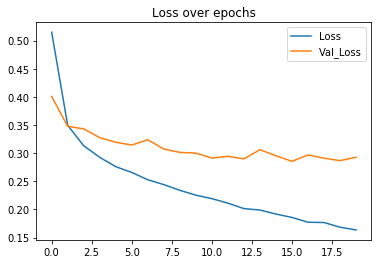

In [12]:
# Fashion Mnist Loss Plot
plt.plot(r.history['loss'], label = 'Loss')
plt.plot(r.history['val_loss'], label = 'Val_Loss')
plt.legend()
plt.title('Loss over epochs')
plt.show()

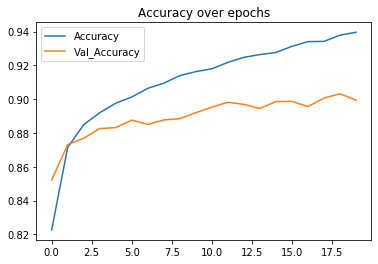

In [13]:
# Mnist Accuracy Plot
plt.plot(r.history['accuracy'], label = 'Accuracy')
plt.plot(r.history['val_accuracy'], label = 'Val_Accuracy')
plt.legend()
plt.title('Accuracy over epochs')
plt.show()